#### 1. Load in data

In [1]:
# load libraries
import os
import shutil
import tarfile
import urllib.request
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import tensorflow as tf

In [2]:
import platform

# Check operating system
is_macos = platform.system() == 'Darwin'

if is_macos:
    # For MacOS, use TensorFlow backend
    os.environ['KERAS_BACKEND'] = 'tensorflow'
    import tensorflow as tf
    print("Using TensorFlow backend on MacOS")
    device = '/GPU:0' if tf.config.list_physical_devices('GPU') else '/CPU:0'
else:
    # For other OS, use PyTorch backend
    os.environ['KERAS_BACKEND'] = 'torch'
    import torch
    print("Using PyTorch backend")
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(f"Using device: {device}")

Using PyTorch backend
Using device: cuda


**skip the below cells for downloading the data. the cell used is further down below**

In [19]:
# # download data from tensorflow
# DATA_DIR = "../data"
# os.makedirs(DATA_DIR, exist_ok=True)

# # URLs
# IMAGES_URL = "http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar"
# ANNOT_URL = "http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar"

# IMAGE_TAR_PATH = os.path.join(DATA_DIR, "images.tar")
# ANNOT_TAR_PATH = os.path.join(DATA_DIR, "annotation.tar")

# def download(url, path):
#     if os.path.exists(path):
#         print(f"{path} already exists, skipping download.")
#         return
#     print(f"Downloading {url} ...")
#     urllib.request.urlretrieve(url, path)
#     print("Done!")

# download(IMAGES_URL, IMAGE_TAR_PATH)
# download(ANNOT_URL, ANNOT_TAR_PATH)

In [20]:
# # extract
# def extract(tar_path, extract_to):
#     print(f"Extracting {tar_path} ...")
#     with tarfile.open(tar_path) as tar:
#         tar.extractall(extract_to)
#     print("Done!")

# extract(IMAGE_TAR_PATH, DATA_DIR)
# extract(ANNOT_TAR_PATH, DATA_DIR)

In [21]:
# # ensure clean directory structure
# IMAGES_ROOT = os.path.join(DATA_DIR, "Images")

# # Verify structure
# print("Number of breeds:", len(os.listdir(IMAGES_ROOT)))

print statments below to how data is being labled right now!

In [13]:
# first print statments

# to list all the subfolders inside IMAGES directory
breeds = os.listdir(IMAGES_ROOT)
# prints the number of breeds detected
print(len(breeds))
# prints the first 10 breed folders
print("first 10 breed folders", breeds[:10])

# output of breeds is not ordered - so dependent on OS/computer
# no sorting is occurring so

120
first 10 breed folders ['n02106166-Border_collie', 'n02091831-Saluki', 'n02096177-cairn', 'n02089078-black-and-tan_coonhound', 'n02111889-Samoyed', 'n02113186-Cardigan', 'n02106662-German_shepherd', 'n02099712-Labrador_retriever', 'n02093428-American_Staffordshire_terrier', 'n02108551-Tibetan_mastiff']


In [14]:

# see how eaach breed is labled
print("\nBreed → Label Index Mapping:")
for i, b in enumerate(breeds):
    print(i, "→", b)



Breed → Label Index Mapping:
0 → n02106166-Border_collie
1 → n02091831-Saluki
2 → n02096177-cairn
3 → n02089078-black-and-tan_coonhound
4 → n02111889-Samoyed
5 → n02113186-Cardigan
6 → n02106662-German_shepherd
7 → n02099712-Labrador_retriever
8 → n02093428-American_Staffordshire_terrier
9 → n02108551-Tibetan_mastiff
10 → n02102480-Sussex_spaniel
11 → n02105162-malinois
12 → n02094114-Norfolk_terrier
13 → n02095889-Sealyham_terrier
14 → n02105855-Shetland_sheepdog
15 → n02115641-dingo
16 → n02112137-chow
17 → n02096051-Airedale
18 → n02099267-flat-coated_retriever
19 → n02112350-keeshond
20 → n02090379-redbone
21 → n02113712-miniature_poodle
22 → n02106382-Bouvier_des_Flandres
23 → n02101006-Gordon_setter
24 → n02097047-miniature_schnauzer
25 → n02097298-Scotch_terrier
26 → n02113799-standard_poodle
27 → n02107683-Bernese_mountain_dog
28 → n02100583-vizsla
29 → n02090622-borzoi
30 → n02098413-Lhasa
31 → n02092002-Scottish_deerhound
32 → n02091635-otterhound
33 → n02105641-Old_English_

In [15]:
import random

print("\nRandom image → label checks:")
for _ in range(5):
    breed = random.choice(breeds)
    breed_path = os.path.join(IMAGES_ROOT, breed)
    img = random.choice(os.listdir(breed_path))
    label = breeds.index(breed)
    print(f"Image: {img:20s}  Breed: {breed:30s}  Label: {label}")



Random image → label checks:
Image: n02108422_964.jpg     Breed: n02108422-bull_mastiff          Label: 57
Image: n02105162_8242.jpg    Breed: n02105162-malinois              Label: 11
Image: n02110185_12380.jpg   Breed: n02110185-Siberian_husky        Label: 61
Image: n02086910_6509.jpg    Breed: n02086910-papillon              Label: 98
Image: n02104365_7956.jpg    Breed: n02104365-schipperke            Label: 114


In [17]:
# to verify annotation for each breed folder
ANNOT_ROOT = os.path.join(DATA_DIR, "Annotation")

print("Checking annotation coverage per breed:")
for breed in breeds[:10]:  # check first 10 only
    annot_folder = os.path.join(ANNOT_ROOT, breed)
    if not os.path.exists(annot_folder):
        print("Missing annotation folder for:", breed)
    else:
        xmls = os.listdir(annot_folder)
        print(f"{breed}: {len(xmls)} XML files")


Checking annotation coverage per breed:
n02106166-Border_collie: 150 XML files
n02091831-Saluki: 200 XML files
n02096177-cairn: 197 XML files
n02089078-black-and-tan_coonhound: 159 XML files
n02111889-Samoyed: 218 XML files
n02113186-Cardigan: 155 XML files
n02106662-German_shepherd: 152 XML files
n02099712-Labrador_retriever: 171 XML files
n02093428-American_Staffordshire_terrier: 164 XML files
n02108551-Tibetan_mastiff: 152 XML files


In [18]:
missing_annotation = 0

print("Verifying image–annotation pairs...")
for breed in breeds:
    breed_dir = os.path.join(IMAGES_ROOT, breed)
    annot_dir = os.path.join(ANNOT_ROOT, breed)

    for img in os.listdir(breed_dir):
        img_id = os.path.splitext(img)[0]
        xml_path = os.path.join(annot_dir, img_id)
        if not os.path.exists(xml_path):
            missing_annotation += 1
            print("Missing annotation for:", img)

print("Total missing annotations:", missing_annotation)


Verifying image–annotation pairs...
Total missing annotations: 0


In [ ]:
# everything seems good so far but breeds are not sorted
# sort breeds then


attempt to sort data for proper labeling **this and the below are used**

In [3]:
# import libraries for downloading the data

import os
import glob
import urllib.request
import tarfile

# to make google colab compatible
DATA_DIR = "/content/data" # where all downloaded data will go

# where folder containing images subfolders will go
IMAGES_ROOT = os.path.join(DATA_DIR, "Images")

# where folder of annotations will go
ANNOT_ROOT  = os.path.join(DATA_DIR, "Annotation")

# create the directory if it doesn't exist yet
os.makedirs(DATA_DIR, exist_ok=True)

# download the images and annotate tars
IMAGES_URL = "http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar"
ANNOT_URL  = "http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar"

# where to save image tar file into images folder
IMAGE_TAR_PATH = os.path.join(DATA_DIR, "images.tar")

# where to save annotation file into annotation folder
ANNOT_TAR_PATH = os.path.join(DATA_DIR, "annotation.tar")

# function to download the file
def download(url, path):
    if os.path.exists(path):
        print(f"{path} already exists, skipping download.")
        return
    print(f"Downloading {url} ...")
    urllib.request.urlretrieve(url, path)
    print("Done!\n")
# download images if not already downloaded
download(IMAGES_URL, IMAGE_TAR_PATH)
# download annotations if not already downloaded
download(ANNOT_URL, ANNOT_TAR_PATH)

# function to extarct the tar files that were downloaded
def extract(tar_path, extract_to):
    print(f"Extracting {tar_path} ...")
    with tarfile.open(tar_path) as tar:
        tar.extractall(extract_to)
    print("Done!\n")
# extracts the data if it wasn't extracted already
extract(IMAGE_TAR_PATH, DATA_DIR)
extract(ANNOT_TAR_PATH, DATA_DIR)

# to sort the breed folders
if not os.path.exists(IMAGES_ROOT):
    raise FileNotFoundError(f"{IMAGES_ROOT} not found. Check extraction paths.")

# sort the breeds alphabetically
breeds = sorted(os.listdir(IMAGES_ROOT))

# prints number of breeds
print("Number of breeds:", len(breeds))
# prints the first 10 breed names
print("First 10 breeds:", breeds[:10], "\n")

# Mapping from breed to index based on sorted order
class_to_idx = {breed: idx for idx, breed in enumerate(breeds)}

# to pair images with annotations folders properly

# lists to storey images and labels
images = []
labels = []

for breed in breeds: # to loop through each breed folder
    breed_img_dir   = os.path.join(IMAGES_ROOT, breed) # path for each image folder
    breed_annot_dir = os.path.join(ANNOT_ROOT, breed) # path for eah annotation folder

     # to list all the images for breed at the moment
    image_files = glob.glob(os.path.join(breed_img_dir, "*.jpg"))

    # for each file, extract the filename
    for img_path in image_files:
        base = os.path.splitext(os.path.basename(img_path))[0]

        # to check that annotation folder exists (latest tar format)
        annot_folder = os.path.join(breed_annot_dir, base)
        if not os.path.exists(annot_folder):
            print("Missing annotation for:", img_path)
            continue # if not missing annotation proceeds with a warning
        # if annotation, append to images and labels properly
        images.append(img_path)
        labels.append(class_to_idx[breed])

print("Total usable images:", len(images))

# an example entry
if len(images) > 0:
    print("\nExample image path:", images[0])
    print("Label index:", labels[0])
    print("Breed:", breeds[labels[0]])
else:
    print("No images were successfully paired. Check extraction paths.")


Done!

Done!

Extracting /content/data/images.tar ...


/tmp/ipython-input-422278974.py:47: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(extract_to)


Done!

Extracting /content/data/annotation.tar ...
Done!

Number of breeds: 120
First 10 breeds: ['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound'] 

Total usable images: 20580

Example image path: /content/data/Images/n02085620-Chihuahua/n02085620_2650.jpg
Label index: 0
Breed: n02085620-Chihuahua


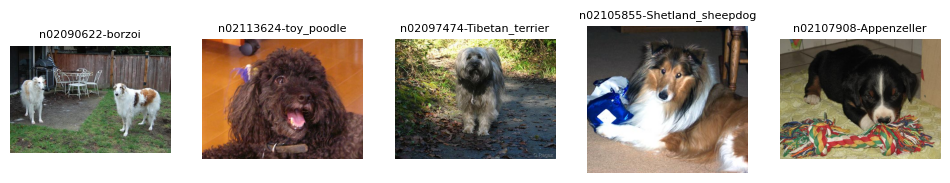

In [4]:
# code to check output of labels
import matplotlib.pyplot as plt
# import numpy to
import numpy as np
import random
from PIL import Image

# sample 5 images randomly and print image and label
sample_indices = random.sample(range(len(images)), 5)

plt.figure(figsize=(12, 6))
for i, idx in enumerate(sample_indices):
    img = Image.open(images[idx])
    label = labels[idx]
    breed_name = breeds[label]

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(breed_name, fontsize=8)
    plt.axis('off')
plt.show()


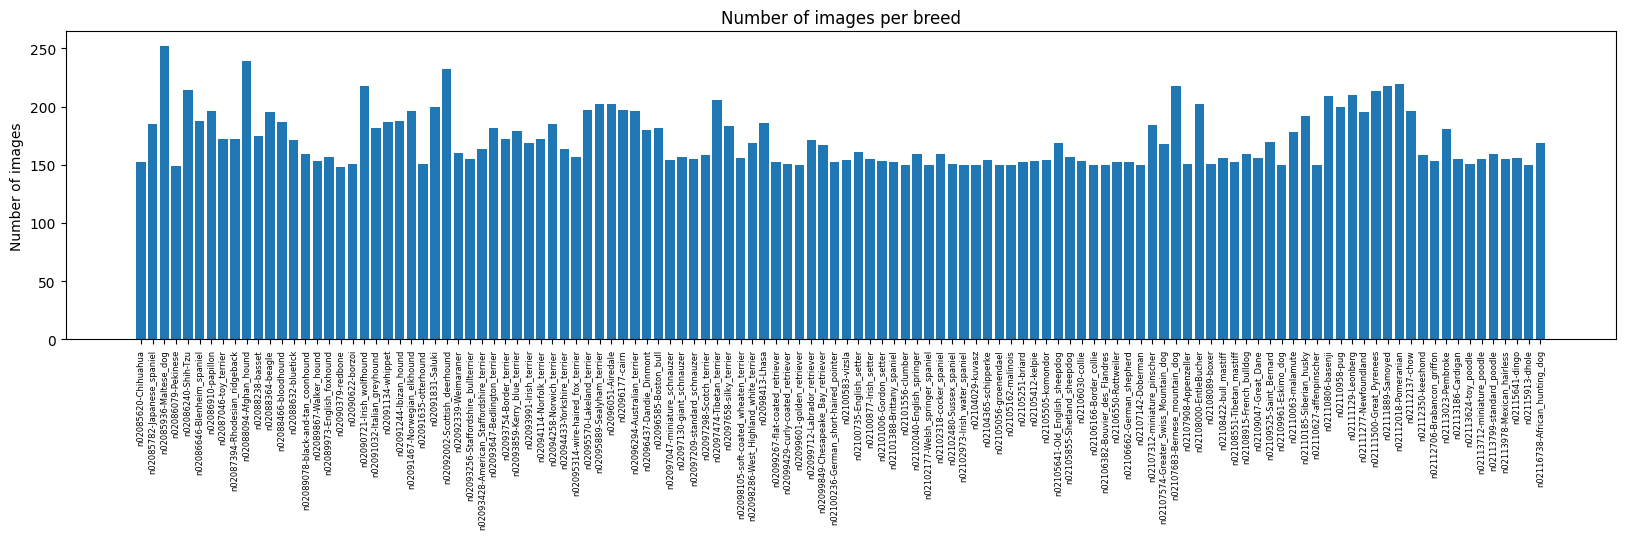

In [5]:
# see distribution of current coutns per breed / class

# get counts for each breeds
counts = [labels.count(i) for i in range(len(breeds))]

# plotting
plt.figure(figsize=(20,4))
plt.bar(range(len(breeds)), counts)
plt.xticks(range(len(breeds)), breeds, rotation=90, fontsize=6)
plt.ylabel("Number of images")
plt.title("Number of images per breed")
plt.show()

In [5]:
# to ensure there are 120 labels used
unique_labels = set(labels)
print("Number of unique labels:", len(unique_labels))
assert len(unique_labels) == len(breeds)
# assertion works and is good

Number of unique labels: 120


In [6]:
# check a breed
  # do chiuahua since it was given in one of the ouput above
breed_to_check = "n02085620-Chihuahua"
breed_idx = class_to_idx[breed_to_check]

# get all images with this label
breed_images = [img for img, lbl in zip(images, labels) if lbl == breed_idx]

print(f"Number of images labeled {breed_to_check}: {len(breed_images)}")
print("First 5 image paths:", breed_images[:5])


Number of images labeled n02085620-Chihuahua: 152
First 5 image paths: ['/content/data/Images/n02085620-Chihuahua/n02085620_952.jpg', '/content/data/Images/n02085620-Chihuahua/n02085620_3928.jpg', '/content/data/Images/n02085620-Chihuahua/n02085620_368.jpg', '/content/data/Images/n02085620-Chihuahua/n02085620_3593.jpg', '/content/data/Images/n02085620-Chihuahua/n02085620_9351.jpg']


#### 2. Conduct Data Splits

In [5]:
# import progress bar
from tqdm import tqdm
import shutil
from sklearn.model_selection import train_test_split


OUTPUT_DIR = os.path.join(DATA_DIR, "data_splits")
os.makedirs(OUTPUT_DIR, exist_ok=True)

train_dir = os.path.join(OUTPUT_DIR, "train")
val_dir = os.path.join(OUTPUT_DIR, "val")
test_dir = os.path.join(OUTPUT_DIR, "test")

for d in [train_dir, val_dir, test_dir]:
    os.makedirs(d, exist_ok=True)

# need to sort breeds
breeds = sorted(os.listdir(IMAGES_ROOT))


for breed in tqdm(breeds, desc="Splitting breeds"):
    breed_path = os.path.join(IMAGES_ROOT, breed)

    # all image paths for this breed
    image_files = [
        os.path.join(breed_path, f)
        for f in os.listdir(breed_path)
        if f.lower().endswith(".jpg")
    ]

    # create splits now

    # 70% train, 15% val, 15% test for splits
    train_imgs, temp_imgs = train_test_split(
        image_files, test_size=0.30, random_state=42
    )
    val_imgs, test_imgs = train_test_split(
        temp_imgs, test_size=0.50, random_state=42
    )

    # output breed folders
    for split_name, split_imgs in zip(["train", "val", "test"],
                                      [train_imgs, val_imgs, test_imgs]):

        split_breed_folder = os.path.join(OUTPUT_DIR, split_name, breed)
        os.makedirs(split_breed_folder, exist_ok=True)

        # copy images to proper split folder
        for img_path in split_imgs:
            shutil.copy(img_path, split_breed_folder)

print("Dataset split complete!")
print(f"Train directory: {train_dir}")
print(f"Val directory:   {val_dir}")
print(f"Test directory:  {test_dir}")

Splitting breeds: 100%|██████████| 120/120 [00:02<00:00, 54.29it/s]

Dataset split complete!
Train directory: /content/data/data_splits/train
Val directory:   /content/data/data_splits/val
Test directory:  /content/data/data_splits/test


In [11]:
# to double check the counts per image split
for split in ["train", "val", "test"]:
    total = sum(len(files) for _, _, files in os.walk(os.path.join(OUTPUT_DIR, split)))
    print(split, total)


train 14357
val 3082
test 3141


In [12]:
# check that the total number of breeds is preseved
print(len(os.listdir(train_dir)), "breeds in train")
print(len(os.listdir(val_dir)),   "breeds in val")
print(len(os.listdir(test_dir)),  "breeds in test")

# all 120 breeds in each split data

120 breeds in train
120 breeds in val
120 breeds in test


#### 3. Convert to TF Dataset for efficiency

In [6]:
# convert to pytorch dataset


import tensorflow as tf

IMG_SIZE = 224
BATCH_SIZE = 32

#split directories
OUTPUT_DIR = os.path.join(DATA_DIR, "data_splits")
train_dir = os.path.join(OUTPUT_DIR, "train")
val_dir   = os.path.join(OUTPUT_DIR, "val")
test_dir  = os.path.join(OUTPUT_DIR, "test")

# training dataset first
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode="int",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
)

# validation dataset now
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    label_mode="int",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False,
)

# test dataset last
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode="int",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False,
)


Found 14357 files belonging to 120 classes.
Found 3082 files belonging to 120 classes.
Found 3141 files belonging to 120 classes.


#### 4. Cleaning/Augmentation with Keras

In [9]:
# data augmentation using pytorch
from torchvision import datasets, transforms
from  keras import Sequential
from keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom

# data augmentation

data_augmentation = Sequential([
    Rescaling(1./255), # normalize pixel values
   RandomFlip("horizontal"), # random horizontal flip
  RandomRotation(0.1), # random rotations up to 0.10 degrees
  RandomZoom(0.1) #random zoom in/out by 90-110%
])

# 2. Normalization only for validation/test
normalization = Rescaling(1./255)

# 3. Apply augmentation/normalization to datasets

# train gets augmentations
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

# validation and test only normalized
val_ds = val_ds.map(lambda x, y: (normalization(x), y))
test_ds = test_ds.map(lambda x, y: (normalization(x), y))

# 4. Cache, shuffle, prefetch for performance

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds   = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds  = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

#### 5. Build CNN Structure

In [10]:
from tensorflow.keras import layers, optimizers, models
import keras

def cnn_base_model():
    # using sequential
    model = keras.models.Sequential([

        # creating first convolutional block
        # first convolution layer
        layers.Conv2D(32, (3,3), padding='same', input_shape=(224,224,3)),
        # then BatchNormalization - to normalize the activations of each layer
        layers.BatchNormalization(),
        # Maxpooling - to reduce spatial zsize by taking max value in each window
        layers.MaxPooling2D(2,2),

        # second convolution block
        layers.Conv2D(64, (3,3), padding='same'), # similar set up as prev block
        # add BatchNormalization
        layers.BatchNormalization(),
        # max pooling
        layers.MaxPooling2D(2,2),

        # third convolution block
        layers.Conv2D(128, (3,3), padding='same'), # similar as above
        # add BatchNormalization
        layers.BatchNormalization(),
        # add max pooling
        layers.MaxPooling2D(2,2),

        # now to add dense layer

        # first need to flatten
        layers.Flatten(),

        # one dense layer
        layers.Dense(128),
        # add batch normalization
        layers.BatchNormalization(),
        # add a dropout layer
        layers.Dropout(0.4),

        # need the output layer for 120 classes (breeds of dogs)
        layers.Dense(120, activation='softmax')
    ])

    # to compile the model
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',  # use this bc integer class labels
        metrics=['accuracy']
    )

    # print summary of model
    model.summary()
    return model

model = cnn_base_model()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120)            │        15,480 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,955,320 (49.42 MB)

 Trainable params: 12,954,616 (49.42 MB)

 Non-trainable params: 704 (2.75 KB)

#### 6. Training

In [11]:
# early stopping to prevent overfitting
from keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    callbacks=[callback]
)


Epoch 1/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 178s 36ms/step - accuracy: 0.0217 - loss: 5.0640 - val_accuracy: 0.0428 - val_loss: 4.4520
Epoch 2/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.0478 - loss: 4.4794 - val_accuracy: 0.0610 - val_loss: 4.3875
Epoch 3/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.0891 - loss: 4.1204 - val_accuracy: 0.0662 - val_loss: 4.3530
Epoch 4/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.2176 - loss: 3.4799 - val_accuracy: 0.0545 - val_loss: 4.7302
Epoch 5/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.5068 - loss: 2.3799 - val_accuracy: 0.0406 - val_loss: 5.5058
Epoch 6/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8247 - loss: 1.0395 - val_accuracy: 0.0415 - val_loss: 6.1548
Epoch 7/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9643 - loss: 0.2942 - val_accuracy: 0.0308 - val_loss: 6.6126
Epoch 8/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9881 - loss: 0.1123 - val_ac

#### 7. Visualize Training Progress

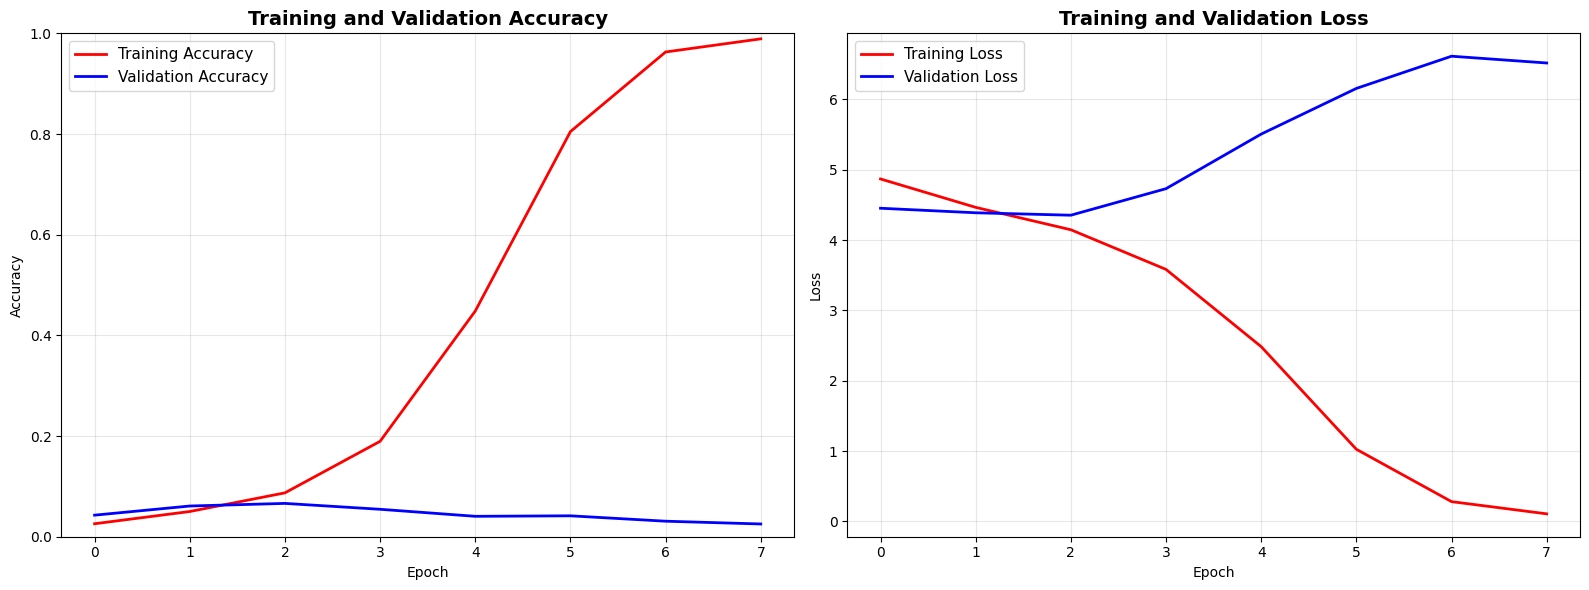


  Training Summary
  Best Training Accuracy:   0.9891
  Best Validation Accuracy: 0.0662
  Final Training Accuracy:  0.9891
  Final Validation Accuracy:0.0253
  Accuracy Gap (final):     0.9638


In [12]:
import matplotlib.pyplot as plt

# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy plot
ax1.plot(epochs_range, acc, 'r-', linewidth=2, label="Training Accuracy")
ax1.plot(epochs_range, val_acc, 'b-', linewidth=2, label="Validation Accuracy")
ax1.set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(fontsize=11); ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1])

# Loss plot
ax2.plot(epochs_range, loss, 'r-', linewidth=2, label="Training Loss")
ax2.plot(epochs_range, val_loss, 'b-', linewidth=2, label="Validation Loss")
ax2.set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(fontsize=11); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Stats printout
print(f"\n{'='*60}")
print("  Training Summary")
print(f"{'='*60}")
print(f"  Best Training Accuracy:   {max(acc):.4f}")
print(f"  Best Validation Accuracy: {max(val_acc):.4f}")
print(f"  Final Training Accuracy:  {acc[-1]:.4f}")
print(f"  Final Validation Accuracy:{val_acc[-1]:.4f}")
print(f"  Accuracy Gap (final):     {abs(acc[-1] - val_acc[-1]):.4f}")
print(f"{'='*60}")

#### 8. Evaluation

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os

# Evaluate on test set
print("Evaluating on test set...")
test_loss, test_accuracy = model.evaluate(test_ds, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Collect true labels and predictions
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Manual accuracy
accuracy = (y_pred == y_true).mean()
print(f"Manual Test Accuracy: {accuracy:.4f}")

# # Confusion Matrix
# cm = confusion_matrix(y_true, y_pred)
# # Retrieve class names directly from the training directory
# class_names = sorted(os.listdir(train_dir))

# plt.figure(figsize=(16, 14))
# sns.heatmap(
#     cm,
#     annot=False,
#     cmap="Blues",
#     xticklabels=class_names,
#     yticklabels=class_names
# )
# plt.title("Dog Breed Classification — Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.tight_layout()
# plt.show()

Evaluating on test set...
Test Loss: 4.3636
Test Accuracy: 0.0672
Manual Test Accuracy: 0.0672
